# 선형회귀분석
최소제곱법(least squares method)를 사용해 정량적인 결과를 예측하는 기법  
[notion](https://www.notion.so/Regression-Analysis-d16b4a36688c4ba7bb1fc98035d11ed5?pvs=4)

In [8]:
STORAGE = strsplit(Sys.getenv("STORAGE"),",")[[1]] # 데이터 저장 위치

# 1. 단변량 선형회귀

In [2]:
data(anscombe)
head(anscombe)

,x1,x2,x3,x4,y1,y2,y3,y4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10,10,10,8,8.04,9.14,7.46,6.58
2,8,8,8,8,6.95,8.14,6.77,5.76
3,13,13,13,8,7.58,8.74,12.74,7.71
4,9,9,9,8,8.81,8.77,7.11,8.84
5,11,11,11,8,8.33,9.26,7.81,8.47
6,14,14,14,8,9.96,8.10,8.84,7.04


In [3]:
# 상관계수
print(cor(anscombe$x1, anscombe$y1))
print(cor(anscombe$x2, anscombe$y2))

[1] 0.8164205
[1] 0.8162365


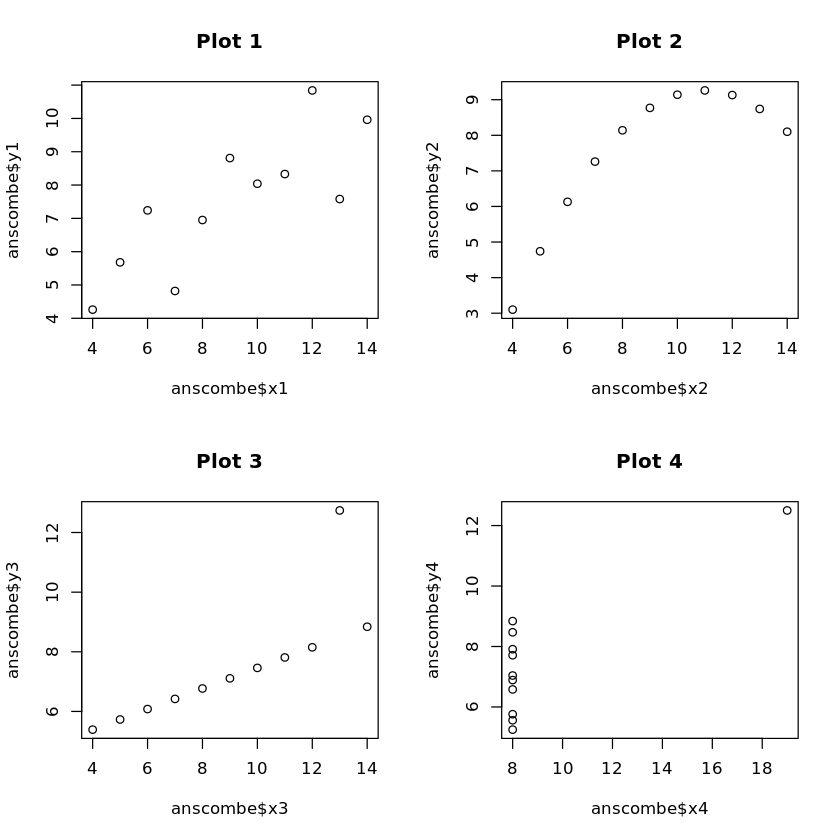

In [4]:
par(mfrow = c(2,2)) # 2x2형태의 그래프를 그림
plot(anscombe$x1, anscombe$y1, main="Plot 1")
plot(anscombe$x2, anscombe$y2, main="Plot 2")
plot(anscombe$x3, anscombe$y3, main="Plot 3")
plot(anscombe$x4, anscombe$y4, main="Plot 4")

- Plot1 : 선형관계를 가지는 것으로 확인된다.
- Plot2 : 선형관계가 아닌 곡선(2차식)으로 확인된다.
- Plot3 : 선형관계이지만 특이점이 존재한다. 이상치일 가능성이 있으며 데이터 수집단계부터 확인이 필요하다.
- Plot4 : 특이점 1개가 상관관계가 있는 것으로 보이게한다.

## SNAKE 데이터
설명 : Wyoming의 Snake강 유역의 눈의 수분함량과 물 생산량을 인치 단위로 제공

<변수 설명>
- X : 눈의 수분함량
- Y : 4월 부터 7월까지의 물 생산량

In [5]:
# 패키지 설치
snake = read.delim(paste(STORAGE, "Structured", "R", "data", "snake.txt",sep="/"), sep=" ", header=TRUE)

dim(snake) # 데이터 차원
head(snake)

[1] 17  2

,X,Y
,<dbl>,<dbl>
1,23.1,10.5
2,32.8,16.7
3,31.8,18.2
4,32.0,17.0
5,30.4,16.3
6,24.0,10.5


,content,yield
,<dbl>,<dbl>
1,23.1,10.5
2,32.8,16.7
3,31.8,18.2
4,32.0,17.0
5,30.4,16.3
6,24.0,10.5


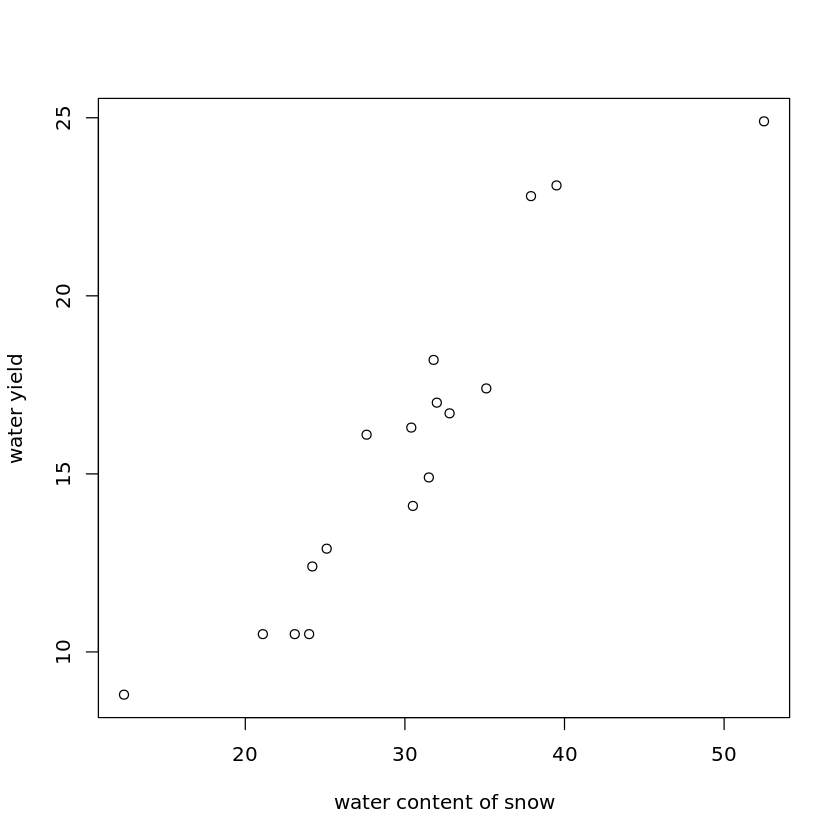

In [6]:
names(snake) <- c("content", "yield") # 이름 설정
head(snake)

par(mfrow=c(1,1))
plot(snake$content, snake$yield, xlab = "water content of snow", ylab = "water yield")

- 데이터가 거의 선형 관계를 가지며 양 끝점의 값은 이상치이다.
- 이상치가 문제가 없으면 그대로 사용하고 아니면 데이터 수집에 문제가 없었는지 확인해야 한다.
- 이상치를 사용할 수 있는 데이터로 보면 그래프는 곡선의 형태를 보인다.

In [7]:
# 회귀분석
yield.fit <- lm(data=snake, yield ~ content)
summary(yield.fit) # 회귀분석 결과


Call:
lm(formula = yield ~ content, data = snake)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1793 -1.5149 -0.3624  1.6276  3.1973 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.72538    1.54882   0.468    0.646    
content      0.49808    0.04952  10.058 4.63e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.743 on 15 degrees of freedom
Multiple R-squared:  0.8709,	Adjusted R-squared:  0.8623 
F-statistic: 101.2 on 1 and 15 DF,  p-value: 4.632e-08


[추정된 회귀식]  
$ yield = 0.49808 \times content + 0.72538 $
- Intercept(절편)은 0.72538, content의 회귀계수는 0.49808로 추정하였다.
- F-statistic의 p-value를 확인해 보면 0.001 보다 작아 귀무가설(모든 회귀계수가 0이다.)을 기각한다. -> 회귀식이 의미가 있다.
- Pr(>|t|)로 추정된 회귀계수들의 유효성을 확인해보면 Intercept는 추정값이 유의하지 않고(귀무가설인 "추정값이 0이다"를 기각하지 못한다.) content는 값이 0.001보다 작아 추정값이 유의하다(귀무가설인 "추정값이 0이다"를 기각한다.)
- R^2(Multiple R-squared)는 0.8709로 yield의 변동값 중 약 87%는 content로 설명이 가능하다.

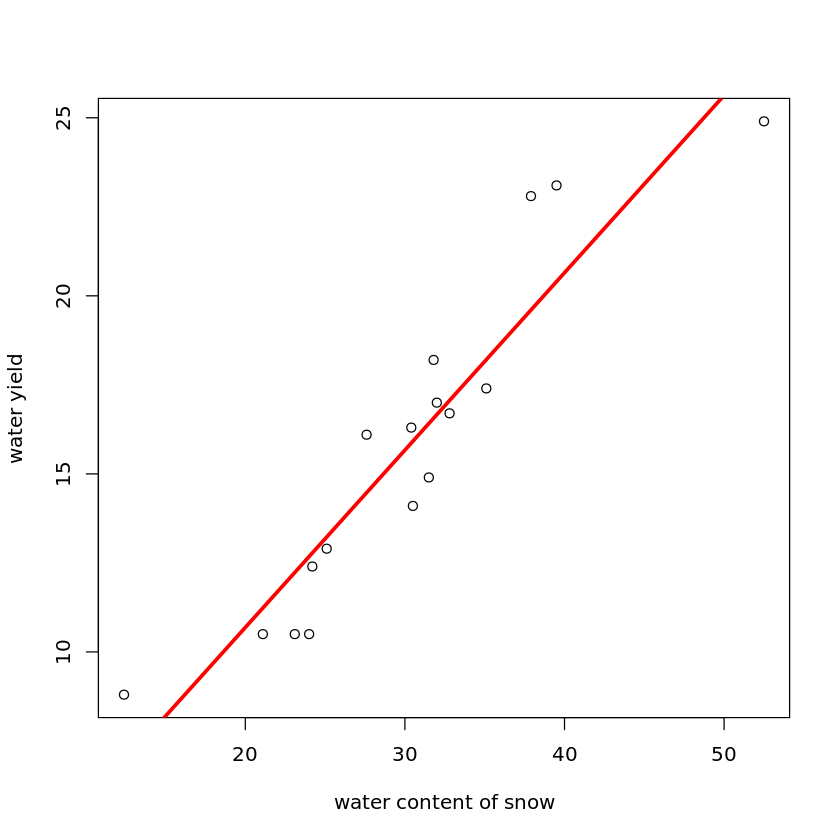

In [8]:
plot(snake$content, snake$yield, xlab = "water content of snow", ylab = "water yield")
abline(yield.fit, lwd=3, col="red")

[회귀모형의 가정]
- 선형성(linearlty) : 예측변수와 반응변수 사이의 선형적 관계를 가진다.
- 오차항의 비상관(non-correlation) : 수집된 자료사이에 서로 상관관계를 가지지 않는다. 시계열 자료나 패널 자료(다시점 자료)일 경우 오차항 사이에 상관관계가 존재할 수 있다.
- 등분산성(homoscedasticity) : 오차항은 정규분포를 따르며 같은 크기의 분산을 가진다. 이 가전을 위배하면 계수의 추정값이 편향되고, 통계적 유의성을 테스트할 때 지나치게 높거나 낮은값을 가진다.
- 비공선성(non-collinearity) : 두 예측변수는 서로 독립이다.
- 이상치의 부재(absence of outliers) : 이상치가 있으면 추정값이 왜곡될 수 있다.

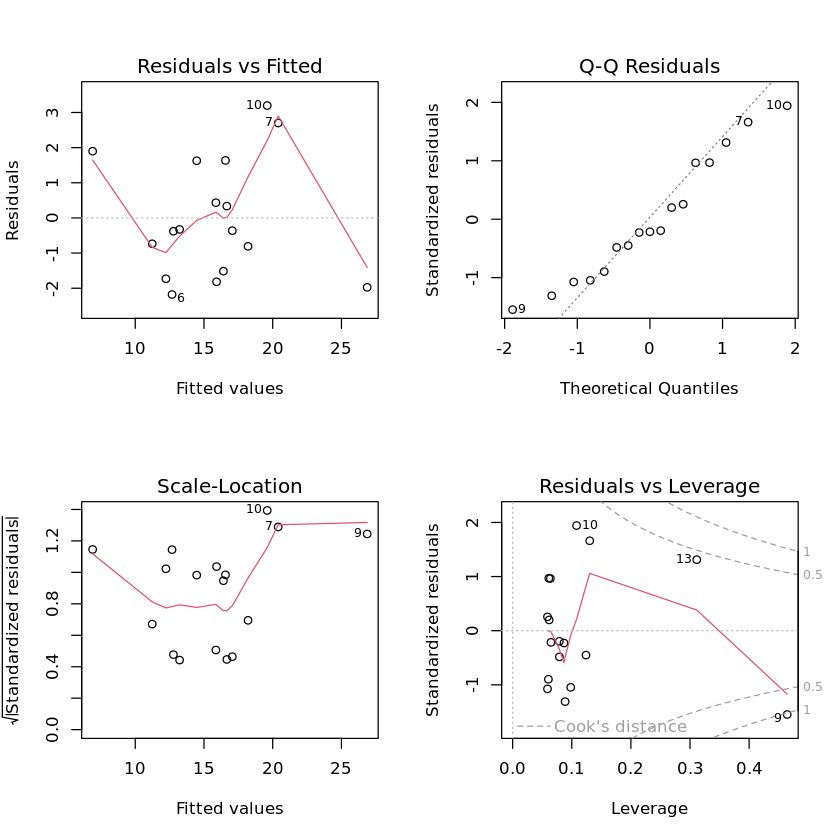

In [9]:
par(mfrow = c(2,2))
plot(yield.fit)

- Residuals vs Fitted : 무작위의 형태를 보이면 종속변수와 독립변수가 선형관계를 가진다.  
    현재 그래프에서 특이한 패턴이 보이지 않아 선형관계를 가진다고 볼 수 있다.
- Scale-Location : 오차의 등분산성을 확인  
    현재 그래프에서 특이한 형태(u자, 깔때기 등)가 보이지 않아 등분산성을 만족한다고 볼 수 있다.  
- Q-Q Residuals : 오차항이 정규분포를 따를는지 확인 직선에 가까울수록 정규분포를 따른다.
    현재 그래프에서 9,7,10 관측치가 직선에서 벗어나 오차항이 정규분포를 띤다는 가정을 위배한다.
- Residuals vs Leverage : Cook's distance에서 1보다 큰 값이 이상치일 가능성이 높다.  
    현재 그래프에서 9번 관측치가 Cook's distance가 1보다 커 이상치로 문제가 있다.

Loading required package: carData



[1]  7 10

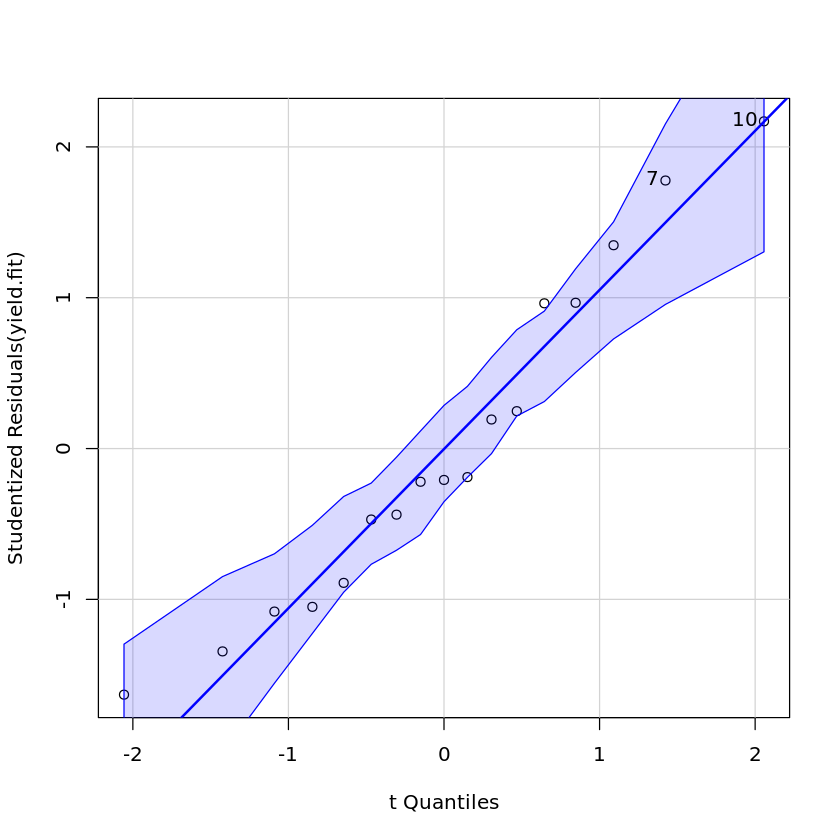

In [10]:
# install.packages("car")
library(car)
qqPlot(yield.fit)

그래프에서는 오차가 정규분포를 따른다고 나타난다.

# 2. 다변량 선형 회귀

## Water 데이터
설명 : 과거의 데이터로 켈리포니아 물 사용량을 예측하는 데이터. 이 데이터 셋은 Owens Valley의 6개의 장소(APMAM, APSAB, APSLAKE, OPBPC, OPRC, OPSLAKE)에서 43년간의 강수량 측정값과 켈리포니아의 Bishop의 하천의 수량을 가지고 있다.  
< 변수 설명 >
- Year : 년도
- APMAM : inches당 적설량
- APSAB : inches당 적설량
- APSLAKE : inches당 적설량
- OPBPC : inches당 적설량
- OPRC : inches당 적설량
- OPSLAKE : inches당 적설량
- BSAAM : 하천의 수량
  
< 특징 >  
시계열 자료이다.(Year이 시간을 나타낸다.) 이번에는 시간을 고려하지 않는다.  
BSAAM이 종속변수, 나머지 6개의 값이 독립변수이다.

In [7]:
water = read.delim(paste(STORAGE, "Structured", "R", "data", "water.txt",sep="/"), sep=" ", header=TRUE)
str(water) # 데이터의 구조를 출력

'data.frame':	43 obs. of  8 variables:
 $ Year   : int  1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 ...
 $ APMAM  : num  9.13 5.28 4.2 4.6 7.15 9.7 5.02 6.7 10.5 9.1 ...
 $ APSAB  : num  3.58 4.82 3.77 4.46 4.99 5.65 1.45 7.44 5.85 6.13 ...
 $ APSLAKE: num  3.91 5.2 3.67 3.93 4.88 4.91 1.77 6.51 3.38 4.08 ...
 $ OPBPC  : num  4.1 7.55 9.52 11.14 16.34 ...
 $ OPRC   : num  7.43 11.11 12.2 15.15 20.05 ...
 $ OPSLAKE: num  6.47 10.26 11.35 11.13 22.81 ...
 $ BSAAM  : int  54235 67567 66161 68094 107080 67594 65356 67909 92715 70024 ...


In [11]:
socal.water <- water[, -1] # 1열 제거
head(socal.water)

,APMAM,APSAB,APSLAKE,OPBPC,OPRC,OPSLAKE,BSAAM
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,9.13,3.58,3.91,4.10,7.43,6.47,54235
2,5.28,4.82,5.20,7.55,11.11,10.26,67567
3,4.20,3.77,3.67,9.52,12.20,11.35,66161
4,4.60,4.46,3.93,11.14,15.15,11.13,68094
5,7.15,4.99,4.88,16.34,20.05,22.81,107080
6,9.70,5.65,4.91,8.88,8.15,7.41,67594


모든 값이 수치형으로 상관관계 통계량(Pearson's)를 사용한다.

In [14]:
# install.packages("corrplot") # 패키지 설치
library(corrplot)
water.cor <- cor(socal.water)
water.cor # 상관계수 행렬

corrplot 0.92 loaded



,APMAM,APSAB,APSLAKE,OPBPC,OPRC,OPSLAKE,BSAAM
APMAM,1.0000000,0.82768637,0.81607595,0.12238567,0.1544155,0.10754212,0.2385695
APSAB,0.8276864,1.00000000,0.90030474,0.03954211,0.1056396,0.02961175,0.1832950
APSLAKE,0.8160760,0.90030474,1.00000000,0.09344773,0.1063836,0.10058669,0.2493409
OPBPC,0.1223857,0.03954211,0.09344773,1.00000000,0.8647073,0.94334741,0.8857478
OPRC,0.1544155,0.10563959,0.10638359,0.86470733,1.0000000,0.91914467,0.9196270
OPSLAKE,0.1075421,0.02961175,0.10058669,0.94334741,0.9191447,1.00000000,0.9384360
BSAAM,0.2385695,0.18329499,0.24934094,0.88574778,0.9196270,0.93843604,1.0000000


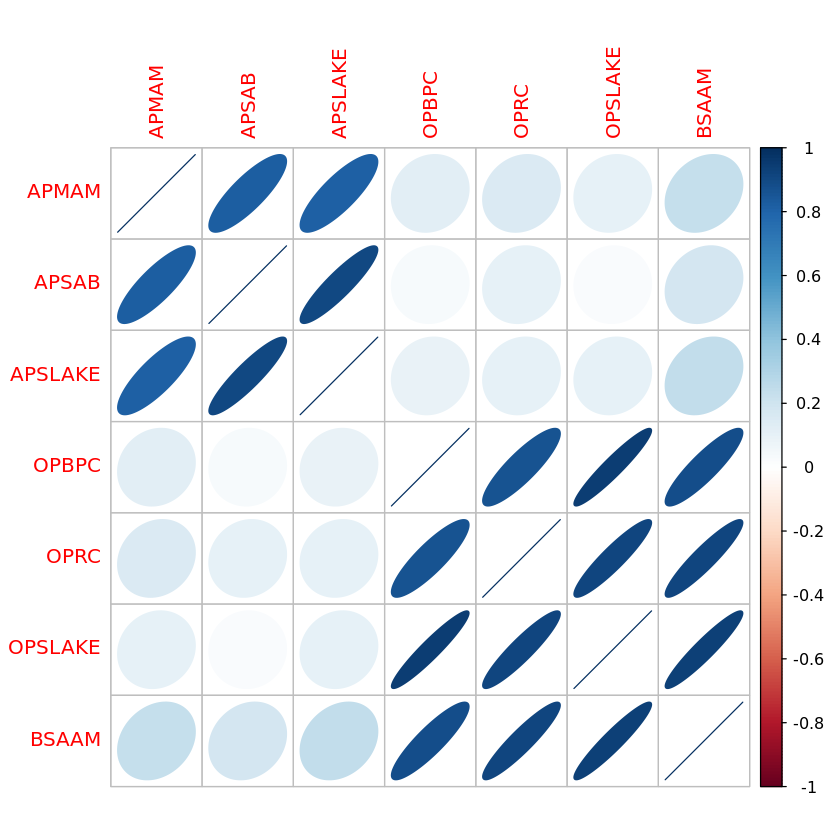

In [15]:
corrplot(water.cor, method="ellipse")

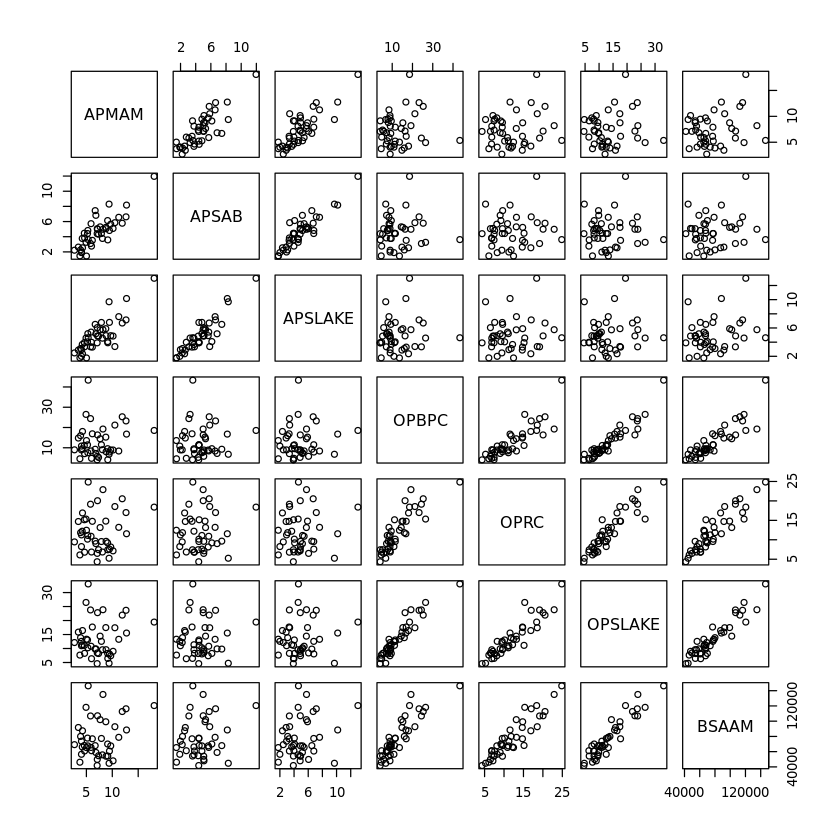

In [16]:
pairs(~ ., data=socal.water)

- APMAM, APSAB, APSLAKE는 서로 상관관계가 높아 주성분 분석 등으로 변수간 관계를 독립적으로 만들 필요가 있다.
- OPBPC, OPRC, OPSLACK는 서로 상관관계가 높아 주성분 분석 등으로 변수 간 관계를 독립적으로 만들 필요가 있다.
- APMAM, APSAB, APSLAKE와 BSAAM의 상관관계가 약해 2차식 등의 관계가 있는지 확인이 필요하다.

### 모형 생성
최량 부분 집합 회귀 분석(best subsets regression)을 사용
- 가능한 모든 경위의 변수의 조합을 이용해 모형을 적합한다.

In [18]:
# install.packages("leaps")
library(leaps)
fit <- lm(BSAAM ~ ., data=socal.water)
summary(fit)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Call:
lm(formula = BSAAM ~ ., data = socal.water)

Residuals:
   Min     1Q Median     3Q    Max 
-12690  -4936  -1424   4173  18542 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 15944.67    4099.80   3.889 0.000416 ***
APMAM         -12.77     708.89  -0.018 0.985725    
APSAB        -664.41    1522.89  -0.436 0.665237    
APSLAKE      2270.68    1341.29   1.693 0.099112 .  
OPBPC          69.70     461.69   0.151 0.880839    
OPRC         1916.45     641.36   2.988 0.005031 ** 
OPSLAKE      2211.58     752.69   2.938 0.005729 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7557 on 36 degrees of freedom
Multiple R-squared:  0.9248,	Adjusted R-squared:  0.9123 
F-statistic: 73.82 on 6 and 36 DF,  p-value: < 2.2e-16


- F-statistic로 모든 회귀계수가 0이 아님을 확인할 수 있다.
- 절편과 OPRC, OPSLACK는 유의하고 나머지 변수들은 0을 가질 가능성이 높다.(변수를 제거하면 값이 바뀔 수 있다.)

In [19]:
# 최량 부분 집합
sub.fit <- regsubsets(BSAAM ~ ., data=socal.water)
best.summary <- summary(sub.fit)
names(best.summary) # summary의 값들을 확인할 수 있다.

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

- bic, adjr2, cp는 모형을 선택하기 위한 값

$$
AIC = n \times \log({RSS_p \over n}) + 2\times p
$$  
- p : 테스트하고 있는 모형의 변수의 수

$$ 
C_p = {RSS_p \over MSE_f} -n +2\times p
$$ 
- p : 테스트하고 있는 모형의 변수의 수
- $MSE_f$ : 모든 변수를 포함한 모형의 MSE
- n : 표본의 크기

$$
BIC = n\times log({RSS_p \over n}) + p \times log(n)
$$ 
- p : 테스트하고 있는 모형의 변수의 수
- n : 표본의 크기

$$ 
Adjusted R^2 = 1 - ({RSS \over n-p-1})/({R^2 \over n-1})
$$ 
- p : 테스트하고 있는 모형의 변수의 수
- n : 표본의 크기

선형 모형에서는 AIC와 CP가 비례한다.
BIC는 CP보다 적은 수의 변수를 가지는 모형을 선택하는 경향이 있다.

In [25]:
which.min(best.summary$rss) # 최소값의 위치를 반환
# 최소 RSS를 같는 모형은 6개의 변수를 가지고 있다.
# 변수가 추가될 수록 RSS는 작아진다.

[1] 6

In [31]:
which.max(best.summary$adjr2) # R^2가 가장 큰 위치를 추출
# 최적의 모형은 3개의 변수를 가진다.

[1] 3

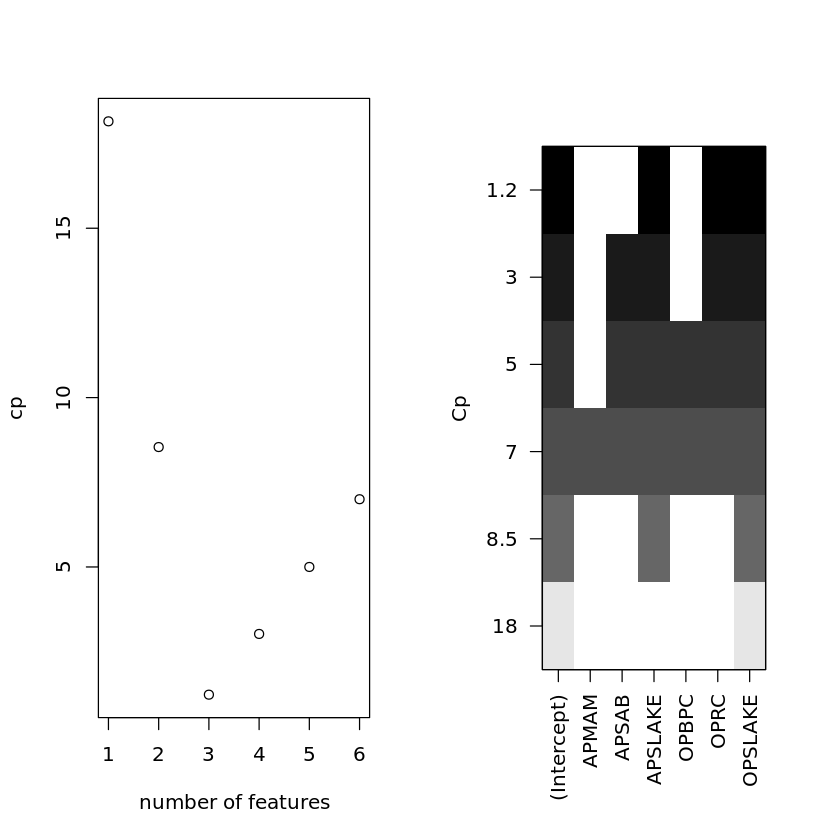

In [35]:
# CP를 그래프로 표현
par(mfrow = c(1,2))
plot(best.summary$cp, xlab="number of features", ylab = "cp")
plot(sub.fit, scale="Cp")

- 왼쪽 그래프에서 3개의 변수를 가지는 모형이 가장 작은 값을 가진다.
- 오른쪽 그래프에서 APSLAKE, OPRC, OPSLAKE가 모형에서 선택된 변수인 것을 알 수 있다.

In [38]:
best.fit <- lm(BSAAM ~ APSLAKE + OPRC + OPSLAKE, data = socal.water)
summary(best.fit)


Call:
lm(formula = BSAAM ~ APSLAKE + OPRC + OPSLAKE, data = socal.water)

Residuals:
   Min     1Q Median     3Q    Max 
-12964  -5140  -1252   4446  18649 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  15424.6     3638.4   4.239 0.000133 ***
APSLAKE       1712.5      500.5   3.421 0.001475 ** 
OPRC          1797.5      567.8   3.166 0.002998 ** 
OPSLAKE       2389.8      447.1   5.346 4.19e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7284 on 39 degrees of freedom
Multiple R-squared:  0.9244,	Adjusted R-squared:  0.9185 
F-statistic: 158.9 on 3 and 39 DF,  p-value: < 2.2e-16


- F 통계량으로 모든 변수가 0이 아님을 알 수 있다.
- t 통계량으로 모든 회귀계수가 유의함을 알 수 있다.

< 추정된 회귀식 >
$$ 
BSAAM = 15424.6 + 1712.5\times APSLAKE + 1797.5 \times OPRC + 2389.8 \times OPSLAKE
$$ 

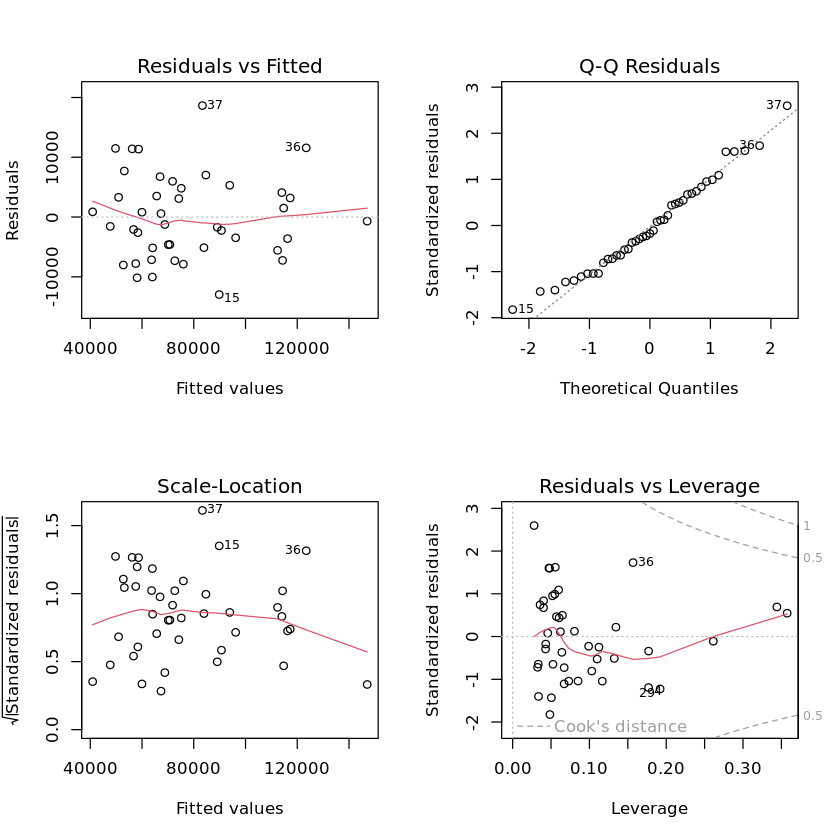

In [40]:
# 회귀식의 가정 확인
par(mfrow = c(2,2))
plot(best.fit)

- Residuals vs Fitted : 특정한 패턴이 없으므로 종속변수와 독립변수가 선형 관계를 가진다고 할 수 있다.
- Q-Q Residuals : 15 관측값이 선을 벗어나 정규분포의 가정에서 벗어난다.
- Scale-Location : 분산이 특정한 형태가 없고 일정해 보인다.
- Residuals vs Leverage : 값이 0.5보다 작아 이상치가 없다고 판단된다.

공선형성을 조사하련면 분산 팽장 인자(VIF, Variance Inflation Factor)를 사용한다.
$$
VIF = {1 \over 1-R_i^2}
$$
- $R^2_i$ : i번째 변수를 다른 변수들로 회귀식을 만들었을 때 계산된 $R^2$ 값
- 일반적으로 VIF >= 5이면 공선형성 문제가 있다고 본다.

In [43]:
library(car)
vif(best.fit) 
# OPRC, OPSLAKE가 5를 넘는다.

APSLAKE     OPRC  OPSLAKE 
1.011499 6.452569 6.444748

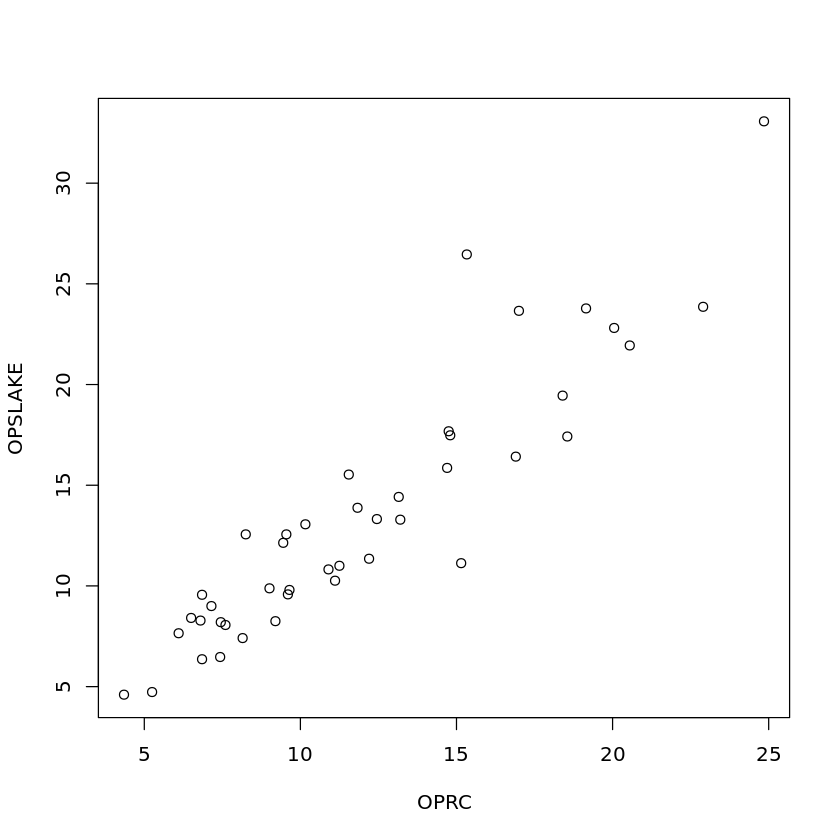

In [45]:
par(mfrow=c(1,1))
plot(socal.water$OPRC, socal.water$OPSLAKE, xlab="OPRC", ylab="OPSLAKE")
# 변수를 제거해 공선형성을 제거할 수 있다.

In [46]:
best.summary$adjr2
# 3개의 변수 모형과 2개의 변수 모형의 차이가 0.01정도로 작아 최적의 모형은 2개의 변수를 가진다고 볼 수 있다.

[1] 0.8777515 0.9001619 0.9185369 0.9168706 0.9146772 0.9123079

In [48]:
fit.2 <- lm(BSAAM ~ APSLAKE + OPSLAKE, data=socal.water)
summary(fit.2)


Call:
lm(formula = BSAAM ~ APSLAKE + OPSLAKE, data = socal.water)

Residuals:
     Min       1Q   Median       3Q      Max 
-13335.8  -5893.2   -171.8   4219.5  19500.2 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  19144.9     3812.0   5.022  1.1e-05 ***
APSLAKE       1768.8      553.7   3.194  0.00273 ** 
OPSLAKE       3689.5      196.0  18.829  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8063 on 40 degrees of freedom
Multiple R-squared:  0.9049,	Adjusted R-squared:  0.9002 
F-statistic: 190.3 on 2 and 40 DF,  p-value: < 2.2e-16


- F통계량이 0.001보다 작아 모든 변수가 0이 아니라 할 수 있다.
- 각 회귀계수의 t 통계량이 0.005보다 작아 모든 회귀 계수가 0이 아니라고 할 수 있다.
< 추정된 회귀식 >
$$ 
BSAAM = 19144.9 + 1768.8 \times APSLAKE + 3689.5 \times OPSLAKE
$$ 

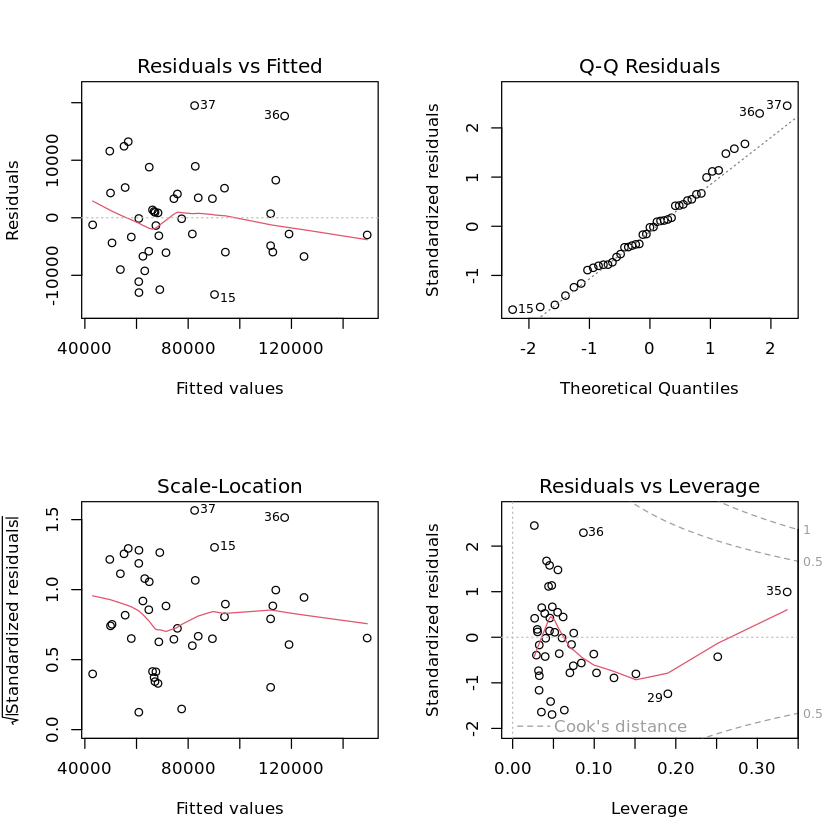

In [49]:
par(mfrow = c(2,2))
plot(fit.2)

- Residuals vs Fitted : 특정한 패턴이 없으므로 종속변수와 독립변수가 선형 관계를 가진다고 할 수 있다.
- Q-Q Residuals : 15 관측값이 선을 벗어나 정규분포의 가정에서 벗어난다.
- Scale-Location : 분산이 특정한 형태가 없고 일정해 보인다.
- Residuals vs Leverage : 값이 0.5보다 작아 이상치가 없다고 판단된다.

In [50]:
vif(fit.2)
# 모든 변수의 값이 5보다 작아 공선형성 문제는 없다고 판단할 수 있다.

APSLAKE  OPSLAKE 
1.010221 1.010221

In [52]:
# 오차의 등분산성 검증
# install.packages("lmtest")
library(lmtest)
bptest(fit.2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric





	studentized Breusch-Pagan test

data:  fit.2
BP = 0.0046205, df = 2, p-value = 0.9977


- BP 테스트의 귀무가설은 "오차항은 등분산성을 가진다.". 대립가설은 "오차항은 등분산성을 가지지 않는다."
- p-value가 0.1보다 크므로 귀무가설을 기각하지 못한다. 따라서 오차항은 등분산성을 가진다.

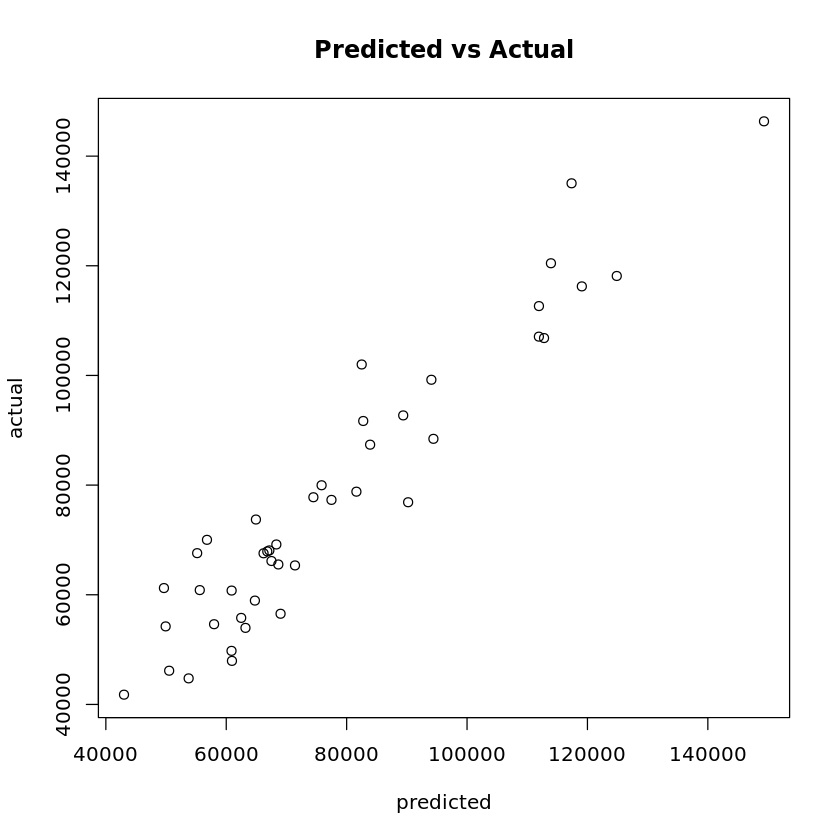

In [54]:
# 예측값과 실제값의 산점도
par(mfrow=c(1,1))
plot(
    fit.2$fitted.values, socal.water$BSAAM, 
    xlab="predicted", ylab="actual",
    main="Predicted vs Actual"
)

`geom_smooth()` using formula = 'y ~ x'


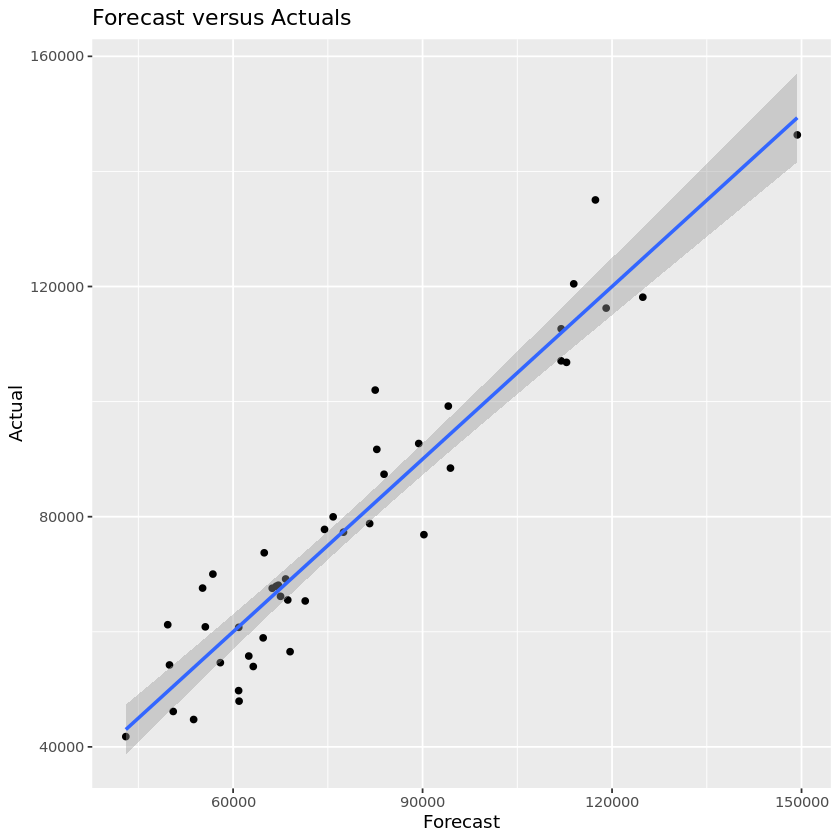

In [59]:
# install.packages("gglot2")
library(ggplot2)
socal.water$Actual = water$BSAAM # 실제값 추가
socal.water["Forecast"] = predict(fit.2) # 예측값 추가
ggplot(data=socal.water, aes(x=Forecast, y=Actual)) +
    geom_point() +
    geom_smooth(method=lm) +
    labs(title="Forecast versus Actuals")

### 교차검증
리브-원-아웃-교차 검증(Leave-One-Out-Cross-Validation)
선형 모형에서 예측 오차 제곱합(PRESS, Prediction Error Sum of Squares) 통계량을 사용하여 가장 작은 값을 가지는 모형을 선택한다.

In [61]:
# install.packages("MPV")
library(MPV)

PRESS(best.fit)
PRESS(fit.2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘randomForest’


Loading required package: lattice

Loading required package: KernSmooth

KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009

Loading required package: randomForest

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




[1] 2426757258

[1] 2992801411

In [80]:
# 직접 PRESS를 계산
PRESS.best  = sum(
    (resid(best.fit)/(1-hatvalues(best.fit)))^2
)

PRESS.fit.2  = sum(
    (resid(fit.2)/(1-hatvalues(fit.2)))^2
)
print(paste("best.fit :", PRESS.best, " | fit.2 :", PRESS.fit.2))

[1] "best.fit : 2426757258.12637  | fit.2 : 2992801411.25866"


## 질적 변수
- 성별, 지역 등을 숫자로 표현되지 못하는 값을 나타낸다.
- 단계(level)를 가질 수 있고(초/중/고등학교 - 학력), 구분만 가능한 경우가 있다.(남/여 - 성별)
- 지표(indicator) 또는 더미(dummy) 변수로 변경하여 분석에 사용한다.(0,로 구분, 남 0, 여 1로 할당)

### Carsets
설명 : 400개의 다른 매장에서 어린이 차 시트 판매를 나타내는 시뮬레이션 데이터
< 변수 설명 >
- Sales : 각 지점의 단위 판매량(1000단위)
- CompPrice : 각 지점의 경쟁업체의 판매 가격
- Advertising : 각 지점의 지역 광고 예산
- Population : 지역의 인구 크기(1000단위)
- Price : 각 지점의 카시트 판매 가격
- ShelveLoc : 각 지점의 카시트의 진열대 위치 품질(좋음, 중간, 나쁨)
- Age : 지역 인구의 평균 연령
- Education : 각 지역의 교육 단계
- Urban : 지점이 도시에 있는지 여부(Yes, No)
- US : 지점이 US에 있는지 여부(Yes, No)

In [84]:
# install.packages("ISLR")
library(ISLR)
data(Carseats)
str(Carseats)

'data.frame':	400 obs. of  11 variables:
 $ Sales      : num  9.5 11.22 10.06 7.4 4.15 ...
 $ CompPrice  : num  138 111 113 117 141 124 115 136 132 132 ...
 $ Income     : num  73 48 35 100 64 113 105 81 110 113 ...
 $ Advertising: num  11 16 10 4 3 13 0 15 0 0 ...
 $ Population : num  276 260 269 466 340 501 45 425 108 131 ...
 $ Price      : num  120 83 80 97 128 72 108 120 124 124 ...
 $ ShelveLoc  : Factor w/ 3 levels "Bad","Good","Medium": 1 2 3 3 1 1 3 2 3 3 ...
 $ Age        : num  42 65 59 55 38 78 71 67 76 76 ...
 $ Education  : num  17 10 12 14 13 16 15 10 10 17 ...
 $ Urban      : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 1 2 2 1 1 ...
 $ US         : Factor w/ 2 levels "No","Yes": 2 2 2 2 1 2 1 2 1 2 ...


In [85]:
sales.fit <- lm(Sales ~ Advertising + ShelveLoc, data=Carseats)
summary(sales.fit)


Call:
lm(formula = Sales ~ Advertising + ShelveLoc, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6480 -1.6198 -0.0476  1.5308  6.4098 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      4.89662    0.25207  19.426  < 2e-16 ***
Advertising      0.10071    0.01692   5.951 5.88e-09 ***
ShelveLocGood    4.57686    0.33479  13.671  < 2e-16 ***
ShelveLocMedium  1.75142    0.27475   6.375 5.11e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.244 on 396 degrees of freedom
Multiple R-squared:  0.3733,	Adjusted R-squared:  0.3685 
F-statistic: 78.62 on 3 and 396 DF,  p-value: < 2.2e-16


In [86]:
contrasts(Carseats$ShelveLoc)

,Good,Medium
Bad,0,0
Good,1,0
Medium,0,1


- ShelveLoc의 변수를 Bad는 (0,0), Good은 (1,0), Medium은 (0,1)로 사용했다.
- F 통계량이 0.001보다 작아 회귀계수가 모두 0이 아니라고 할 수 있다.
- t 통계량이 모든 회귀계수에서 0.001보다 작아 유의하다고 할 수 있다.

## 상호작용 항

In [89]:
# install.packages("MASS")
library(MASS)
data(Boston)
str(Boston)


Attaching package: ‘MASS’


The following object is masked from ‘package:MPV’:

    cement




'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [91]:
value.fit <- lm(medv ~ lstat * age, data=Boston)
summary(value.fit)


Call:
lm(formula = medv ~ lstat * age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.806  -4.045  -1.333   2.085  27.552 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.0885359  1.4698355  24.553  < 2e-16 ***
lstat       -1.3921168  0.1674555  -8.313 8.78e-16 ***
age         -0.0007209  0.0198792  -0.036   0.9711    
lstat:age    0.0041560  0.0018518   2.244   0.0252 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.149 on 502 degrees of freedom
Multiple R-squared:  0.5557,	Adjusted R-squared:  0.5531 
F-statistic: 209.3 on 3 and 502 DF,  p-value: < 2.2e-16


- 상호작용 항은 *로 표시한다.
  

# 로지스틱 회귀 분석 과 판별 분석

## 1. 로지스틱 회귀분석
<로지스틱 모형>
$$
P(Y=y) = {e^{\beta_0 + \beta_1 x} \over 1 + e^{\beta_0 + \beta_1 x}} \\
= {1 \over 1 + e^{-(\beta_0 + \beta_1 x)}}
$$
$$
log{P(Y=y) \over 1 - P(Y=y)} = \beta_0 + \beta_1 x
$$

### biopsy
설명 : Wisconsin 대학 병원에서 수집한 유방암 데이터 셋. 9개의 속성에 대해 1~10까지의 점수를 부여했다. 세침 흡인(FNA, Fine Needle Aspiration)으로 종양을 검사함.
< 변수 설명 >
- ID : 관측치의 번호(유일하지 않다.)
- V1 : 덩어리(종양)의 두께
- V2 : 세포 크기의 균일성
- V3 : 세모 모양의 균일성
- V4 : 한계 부착력
- V5 : 단일 상피세포 크기
- V6 : 나핵(16개의 관측치 결측)
- V7 : 특징 없는 염색질
- V8 : 정상 핵소체
- V9 : 분열
- class : "benign"(양성) 또는 "malignant"(악성)

In [11]:
biopsy = MASS::biopsy
str(biopsy)
# 결과값(class)는 factor 나머지 변수(V1~V9)는 int, ID는 문자열

'data.frame':	699 obs. of  11 variables:
 $ ID   : chr  "1000025" "1002945" "1015425" "1016277" ...
 $ V1   : int  5 5 3 6 4 8 1 2 2 4 ...
 $ V2   : int  1 4 1 8 1 10 1 1 1 2 ...
 $ V3   : int  1 4 1 8 1 10 1 2 1 1 ...
 $ V4   : int  1 5 1 1 3 8 1 1 1 1 ...
 $ V5   : int  2 7 2 3 2 7 2 2 2 2 ...
 $ V6   : int  1 10 2 4 1 10 10 1 1 1 ...
 $ V7   : int  3 3 3 3 3 9 3 3 1 2 ...
 $ V8   : int  1 2 1 7 1 7 1 1 1 1 ...
 $ V9   : int  1 1 1 1 1 1 1 1 5 1 ...
 $ class: Factor w/ 2 levels "benign","malignant": 1 1 1 1 1 2 1 1 1 1 ...


In [12]:
biopsy$ID = NULL # ID 사용하지 않음
names(biopsy) <- c("thick", "u.size", "u.shape", "adhsn", "s.size", "nucl", "chrom", "n.nuc", "mit", "class")
str(biopsy)

'data.frame':	699 obs. of  10 variables:
 $ thick  : int  5 5 3 6 4 8 1 2 2 4 ...
 $ u.size : int  1 4 1 8 1 10 1 1 1 2 ...
 $ u.shape: int  1 4 1 8 1 10 1 2 1 1 ...
 $ adhsn  : int  1 5 1 1 3 8 1 1 1 1 ...
 $ s.size : int  2 7 2 3 2 7 2 2 2 2 ...
 $ nucl   : int  1 10 2 4 1 10 10 1 1 1 ...
 $ chrom  : int  3 3 3 3 3 9 3 3 1 2 ...
 $ n.nuc  : int  1 2 1 7 1 7 1 1 1 1 ...
 $ mit    : int  1 1 1 1 1 1 1 1 5 1 ...
 $ class  : Factor w/ 2 levels "benign","malignant": 1 1 1 1 1 2 1 1 1 1 ...


In [13]:
biopsy.v2 <- na.omit(biopsy) # 결측이 존재하는 행 제거
y <- ifelse(biopsy.v2$class == "malignant", 1, 0) # 양성은 0, 악성은 1 : 예측할 값

In [14]:
# install.packages("reshape2")
# install.packages("ggplot2")
library(reshape2)
library(ggplot2)

biop.m <- melt(biopsy.v2, id.var = "class") # class를 유지하며 나머지변수 명을 variable에 값은 value로 변경한다.
# melt는 data.frame을 variable(변수명), value(값)으로 구조를 무너뜨린다.
str(biop.m)

'data.frame':	6147 obs. of  3 variables:
 $ class   : Factor w/ 2 levels "benign","malignant": 1 1 1 1 1 2 1 1 1 1 ...
 $ variable: Factor w/ 9 levels "thick","u.size",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ value   : int  5 5 3 6 4 8 1 2 2 4 ...


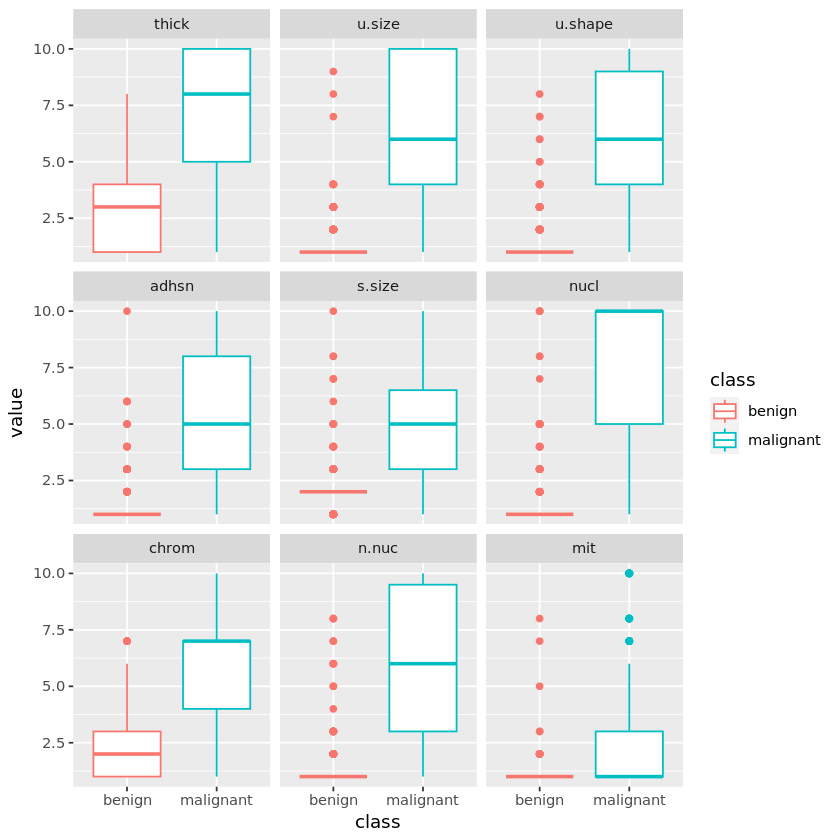

In [15]:
ggplot(data=biop.m, aes(x=class, y=value, color=class)) + 
    geom_boxplot() + 
    facet_wrap(~ variable, ncol=3) # variable로 그래프를 나누며, 행을 3개로 만든다.

- 대부분의 변수에서 malinant가 benign보다 높은 값을 가진다.
- 그래프 상으로 nucl이 가장 집단간의 차이가 커 중요한 변수로 판단된다.
- mit는 집단간 분산의 차이는 있으나 중앙값의 차이가 적어 변수의 중요도가 낮다고 판단된다.

corrplot 0.92 loaded



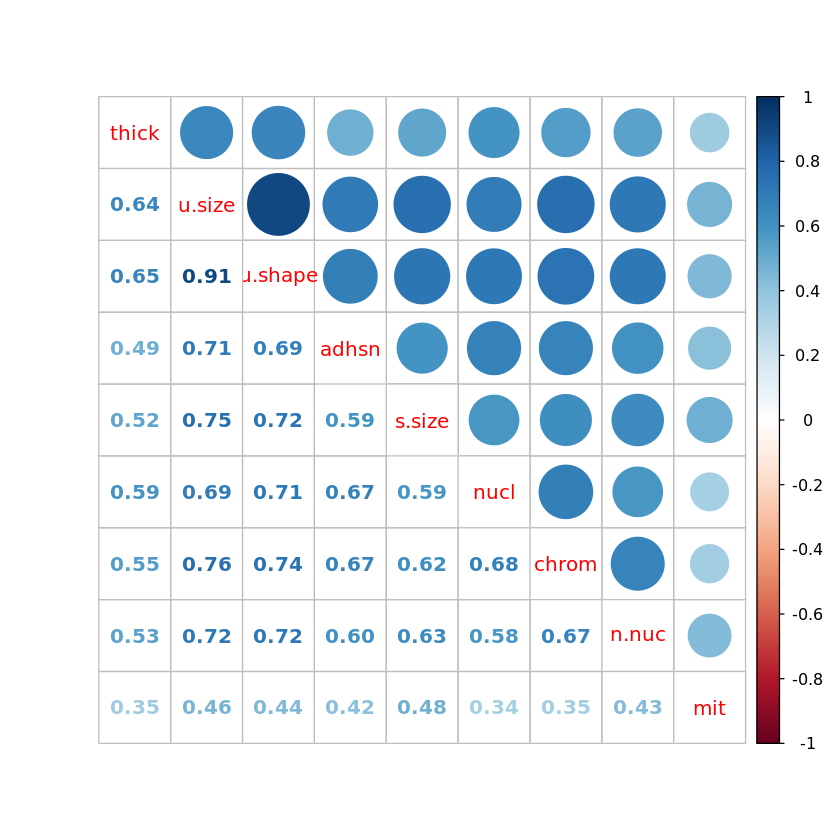

In [16]:
library(corrplot)
bc <- cor(biopsy.v2[, 1:9]) # V1~V9의 변수간 상관성 분석
corrplot.mixed(bc)

- 그래프 상으로 u.size와 u.shape 사이의 공선성 문제가 있다고 판단된다.

In [17]:
set.seed(1234) #변동성 고정
ind <- sample(2, nrow(biopsy.v2), replace=TRUE, prob=c(0.7, 0.3)) 
# 1,2 두 값으 biopsy.v2의 행개수만큼 반복을 허용하며 0.7, 0.3의 확률로 추출한다.
train <- biopsy.v2[ind==1,]
test <- biopsy.v2[ind==2,]
str(train)
str(test)

'data.frame':	472 obs. of  10 variables:
 $ thick  : int  5 5 3 6 8 1 2 2 4 1 ...
 $ u.size : int  1 4 1 8 10 1 1 1 2 1 ...
 $ u.shape: int  1 4 1 8 10 1 2 1 1 1 ...
 $ adhsn  : int  1 5 1 1 8 1 1 1 1 1 ...
 $ s.size : int  2 7 2 3 7 2 2 2 2 1 ...
 $ nucl   : int  1 10 2 4 10 10 1 1 1 1 ...
 $ chrom  : int  3 3 3 3 9 3 3 1 2 3 ...
 $ n.nuc  : int  1 2 1 7 7 1 1 1 1 1 ...
 $ mit    : int  1 1 1 1 1 1 1 5 1 1 ...
 $ class  : Factor w/ 2 levels "benign","malignant": 1 1 1 1 2 1 1 1 1 1 ...
 - attr(*, "na.action")= 'omit' Named int [1:16] 24 41 140 146 159 165 236 250 276 293 ...
  ..- attr(*, "names")= chr [1:16] "24" "41" "140" "146" ...
'data.frame':	211 obs. of  10 variables:
 $ thick  : int  4 1 7 3 2 1 10 2 10 5 ...
 $ u.size : int  1 1 4 2 1 1 10 5 4 3 ...
 $ u.shape: int  1 1 6 1 1 3 10 3 3 3 ...
 $ adhsn  : int  3 1 4 1 1 1 8 3 1 4 ...
 $ s.size : int  2 2 6 1 2 2 6 6 3 2 ...
 $ nucl   : int  1 3 1 1 1 1 1 7 3 4 ...
 $ chrom  : int  3 3 4 2 2 1 8 7 6 3 ...
 $ n.nuc  : int  1 1 3 1

In [18]:
cat("[train]")
table(train$class) # class별 관측치의 개수
cat("\n[test]")
table(test$class) 

[train]


   benign malignant 
      305       167 


[test]


   benign malignant 
      139        72 

#### 모형 적합
[glm]
- 일반 선형 회귀분석 모형
- family로 다양한 회귀모형을 만들 수 있음
    - gaussian : 정규분포
    - binomial : 베르누이 분포(로지스틱)
    - Gamma : 감무 분포
    - inverse.gaussian : 역정규분포
    - possion : 푸아송분포

In [19]:
full.fit <- glm(class ~ ., family="binomial", data=train)
summary(full.fit)


Call:
glm(formula = class ~ ., family = "binomial", data = train)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -10.4810     1.5096  -6.943 3.84e-12 ***
thick         0.5987     0.1880   3.184 0.001453 ** 
u.size       -0.1507     0.2154  -0.699 0.484294    
u.shape       0.3707     0.2613   1.419 0.155984    
adhsn         0.2783     0.1442   1.930 0.053596 .  
s.size        0.1720     0.1780   0.966 0.333824    
nucl          0.3856     0.1076   3.582 0.000341 ***
chrom         0.4508     0.1853   2.433 0.014983 *  
n.nuc         0.1897     0.1190   1.594 0.110979    
mit           0.7016     0.3259   2.153 0.031355 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 613.388  on 471  degrees of freedom
Residual deviance:  76.204  on 462  degrees of freedom
AIC: 96.204

Number of Fisher Scoring iterations: 8


- 절편, thick, s.size, nucl이 유의한 변수로 판단된다.(p-value 참고)


In [20]:
confint(full.fit) # 신뢰구간, 0이 포함되면 유의수준 0.05에 대해 유의하지 않다.

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),-14.037490182,-7.9779590
thick,0.263990692,1.0127468
u.size,-0.562948273,0.3145380
u.shape,-0.170012449,0.8849031
adhsn,-0.002302241,0.5760063
s.size,-0.191307967,0.5197943
nucl,0.182838437,0.6107262
chrom,0.103879966,0.8395823
n.nuc,-0.038309387,0.4353441
mit,0.078380696,1.2825152


In [21]:
# 오즈비
# 변수가 한단위 증가/감소했을 때 변화하는 오즈비의 크기를 나타낸다.
print(exp(coef(full.fit)))
# u.size는 다른 변수들과 달리 오즈비를 감소시킨다. 위의 p-value에서도 가장큰 값을 가진다.

 (Intercept)        thick       u.size      u.shape        adhsn       s.size 
2.806524e-05 1.819788e+00 8.601469e-01 1.448774e+00 1.320818e+00 1.187688e+00 
        nucl        chrom        n.nuc          mit 
1.470494e+00 1.569519e+00 1.208876e+00 2.016995e+00 


In [22]:
library(car)
print(vif(full.fit))
# 5를 넘지않아 공선성문제는 없다고 볼 수 있다.

Loading required package: carData



   thick   u.size  u.shape    adhsn   s.size     nucl    chrom    n.nuc 
1.194274 2.990630 2.953041 1.197594 1.318934 1.224650 1.257913 1.206427 
     mit 
1.083519 


In [23]:
# 변수 선택
train.probs <- predict(full.fit,type="response") # type=response가 결과값을 확률로 만들어 준다.
print(train.probs[1:5]) #5개의 관측치만 확인

          1           2           3           4           6 
0.017708580 0.906995195 0.007941502 0.643432784 0.999948910 


In [24]:
# devtools::install_github("selva86/InformationValue")
library(InformationValue)
trainY <- ifelse(train$class=="benign", 0, 1)
print(confusionMatrix(trainY, train.probs, threshold=0.5)) # 예측과 정답 비교, 0.5이상이면 2 아니면1
cat("오류율")
misClassError(trainY, train.probs) # 오류의 비율

    0   1
0 297   9
1   8 158
오류율

[1] 0.036

In [25]:
test.probs <- predict(full.fit, newdata=test, type="response")
testY <- ifelse(test$class=="benign", 0, 1)
print(confusionMatrix(testY, test.probs))
cat("오류율")
misClassError(testY, test.probs) # 오류율

    0  1
0 137  3
1   2 69
오류율

[1] 0.0237

### 교차검증
- 테스트 셋을 이용한 예측을 향상시키고 과적합의 위험을 최소화하는 것.
- k-fold cross validation : 데이터를 k개로 나눈 뒤 각 그룹은 테스트 데이터 셋으로 k번 학습을 진행 후 결과들의 평균을 내어 가장 적합한 변수를 사용하는 것
- 리브-원-아웃-교차 검증 : 데이터를 1개씩 테스트 데이터로 사용하여 N번 학습하는 방법, 추정의 분산값이 높게 나타난다.
- 보통 k-fold cross validation에서 k를 5나 10으로 정한다.

In [38]:
# install.packages("bestglm") # 교차검증을 자동으로 진행한다.
library(bestglm)

Loading required package: leaps



In [39]:
train.X <- train[, 1:9]
train.Xy <-data.frame(cbind(train.X, trainY)) # trainY는 0,1로 변환한 class값

In [41]:
?bestglm

bestglm {bestglm},R Documentation
Xy,Dataframe containing the design matrix X and the output variable y. All columns must be named.
family,"One of the glm distribution functions. The glm function is not used in the Gaussian case. Instead for efficiency either 'leaps' is used or when factor variables are present with more than 2 levels, 'lm' may be used."
IC,"Information criteria to use: ""AIC"", ""BIC"", ""BICg"", ""BICq"", ""LOOCV"", ""CV""."
t,"adjustable parameter for BICg, BICq or CV. For BICg, default is g=t=1. For BICq, default is q=t=0.25. For CV, default the delete-d method with d=ceil(n(1-1/(log n - 1))) and REP=t=1000. The default value of the parameter may be changed by changing t."
CVArgs,"Used when IC is set to 'CV'. The default is use the delete-d algorithm with d=ceil(n(1-1/(log n - 1))) and t=100 repetitions. Note that the number of repetitions can be changed using t. More generally, CVArgs is a list with 3 named components: Method, K, REP, where Method is one of \""HTF\"", \""DH\"", \""d\"" corresponding to using the functions CVHTM (Hastie et al., 2009, K-fold CV), CVDH (adjusted K-fold CV, Davison and Hartigan, 1997) and CVd (delete-d CV with random subsamples, Shao, 1997)."
qLevel,the alpha level for determining interval for best q. Larger alpha's result in larger intervals.
TopModels,Finds the best TopModels models.
method,Method used in leaps algorithm for searching for the best subset.
intercept,"Default TRUE means the intercept term is always included. If set to FALSE, no intercept term is included. If you want only include the intercept term when it is signficant then set IncludeInterceptQ=FALSE and include a column of 1's in the design matrix."
weights,weights


In [42]:
# 교차검증
bestglm(Xy=train.Xy, IC="CV", CVArgs=list(Method="HTF", K=10, REP=1), family=binomial)

Morgan-Tatar search since family is non-gaussian.



CV(K = 10, REP = 1)
BICq equivalent for q in (1.28552625809908e-05, 0.113789358731797)
Best Model:
              Estimate Std. Error   z value     Pr(>|z|)
(Intercept) -8.4659363 1.04486399 -8.102429 5.387256e-16
thick        0.7261759 0.15886353  4.571067 4.852465e-06
u.shape      0.7277778 0.14910036  4.881127 1.054814e-06
nucl         0.5004655 0.09763709  5.125772 2.963206e-07

- tick, u.shape, nucl 변수가 선택되었다.

In [55]:
reduce.fit <- glm(class ~ thick + u.size + nucl, family=binomial, data=train)

In [56]:
test.cv.probs <- predict(reduce.fit, newdata=test, type="response")
confusionMatrix(testY, test.cv.probs)
cat("오류율")
misClassError(testY, test.cv.probs)

,0,1
,<int>,<int>
0,137,5
1,2,67


오류율

[1] 0.0332

- 축소된 모형이 완전 모형에 비해 덜 정확하지만 나쁜것은 아니다.

In [50]:
# 정보 기준을 BIC로 사용
bestglm(Xy=train.Xy, IC="BIC", family=binomial)
# mit는 pvalue=0.0298로 유의수준 0.01에서 유의하지 않다.

Morgan-Tatar search since family is non-gaussian.



BIC
BICq equivalent for q in (0.487296341372356, 0.546006233805517)
Best Model:
              Estimate Std. Error   z value     Pr(>|z|)
(Intercept) -9.6153928  1.2422512 -7.740297 9.918503e-15
thick        0.6242637  0.1665521  3.748159 1.781375e-04
u.shape      0.5121321  0.1852661  2.764305 5.704414e-03
nucl         0.4108325  0.1098171  3.741062 1.832442e-04
chrom        0.4647409  0.1797343  2.585711 9.717837e-03
mit          0.6566107  0.3022430  2.172459 2.982102e-02

In [58]:
bic.fit <- glm(class ~ thick + u.shape + nucl + chrom, family=binomial, data=train)
test.bic.probs <- predict(bic.fit, newdata=test, type="response")
confusionMatrix(testY, test.bic.probs)
cat("오류율")
misClassError(testY, test.bic.probs)

,0,1
,<int>,<int>
0,137,4
1,2,68


오류율

[1] 0.0284

- 위의 모델보다 낮은 오류율을 보인다.

## 2.판별분석
- 판별 분석(Discriminant Analysis) 또는 피셔 판별 분석(Fisher Discriminal Analysis)는 자주 사용되는 분류기법 중 하나.
- 잘 분리된(well-separated) 클래스의 경우 로지스틱 회수 분석에 비해 효과적이다.
- 로지스틱 회귀분석은 불안정한 추정값을 가질 수 있지만 판별 분석은 이러한 문제에 자유롭다.
- 대신에 변수 사이의 복잡한 관계가 존재하면 판별 분석보다 로지스틱 회귀분석이 더 좋다.
- 판별 분석은 각 관찰값이 속할 클래스의 확률을 정하기 위해 베이즈 정리를 사용한다.
- 선형 판별 분석(LDA, Linear Descriminant Analysis), 이차 판별 분석(QDA, Quadratic Discriminant Analysis)가 존재한다.

$$
P(Y|X) = {P(X,Y) \over P(X)}
$$

- X와 Y의 결합 분포를 알고 있고 X가 주어졌을 때 더 큰 확률값(사후확률, posterior probability)을 가지는 클래스로 관찰값을 배정한다.
[사후 확률을 얻는 과정]
1. 어떤 클래스에 속해 있는지 아는 데이터를 수집
2. 사전 확률(prior probability)을 계산. 이 값은 각 데이터에 속할 표본의 비율을 나타낸다.
3. 클래스별로 각 변수 평균을 계산.
4. 각 변수에 관해 분산 공분산 행렬(Variance-Covariance matrix)를 계산. 만일 선형 판별분석의 경우 모든 클래스를 통틀어 계산한 합동 행렬(pooled matrix)에 해당하고, 선형 분류기가 된다. 이차 판별분석의 경우 각 클래스에 고나한 분산-공분산 행렬이 된다.
5. 각 클래스에 관해 정규분포를 추정한다.
6. 새로운 관찰값을 분류하는 규칙이 될 discriminant 함수를 계산한다.
7. 계산한 discriminant 함수의 값에 근거해 관찰값을 해당 클래스에 배정한다.

$$
p_{\pi}(X) = \pi_k f_k(X)/ \sum_{i=1}^k \pi_i f_i(X)
$$
- $\pi_k$ : 클래스 k에 속하는 표본의 개수/전체 표본의 개수 -> 사전 확률
- $f_k(X) = P(X=x|Y=y)$ : k번째 클래스인 관찰값의 확률 밀도함수. 정규분포를 따른다고 가정한다. 변수가 복수인 경우 다변량 정규분포를 따른다.
- $p_k(X)$ : X가 주어졌을 때 Y일 확률 -> 사후 확률

- 결정 분계선(decision boundary) : 클래스를 구분하는 경계, k-1개의 결정 분계선을 가진다.

In [61]:
library(MASS) # 판별분석 함수가 포함되어 있다.
data(biopsy)

In [63]:
lda.fit <- lda(class ~ ., data=train)
lda.fit

Call:
lda(class ~ ., data = train)

Prior probabilities of groups:
   benign malignant 
0.6461864 0.3538136 

Group means:
             thick   u.size  u.shape    adhsn   s.size     nucl    chrom
benign    3.006557 1.347541 1.409836 1.373770 2.124590 1.334426 2.131148
malignant 7.083832 6.502994 6.532934 5.556886 5.263473 7.712575 5.850299
             n.nuc      mit
benign    1.298361 1.078689
malignant 5.898204 2.904192

Coefficients of linear discriminants:
                LD1
thick   0.189076431
u.size  0.107205271
u.shape 0.081504030
adhsn   0.032985053
s.size  0.100914930
nucl    0.268741506
chrom   0.112070302
n.nuc   0.080503007
mit     0.004782484

[그룹 별 사전확률(Prior Probabilities of groups)]
-  benign : 0.6461864
-  malignant : 0.3538136

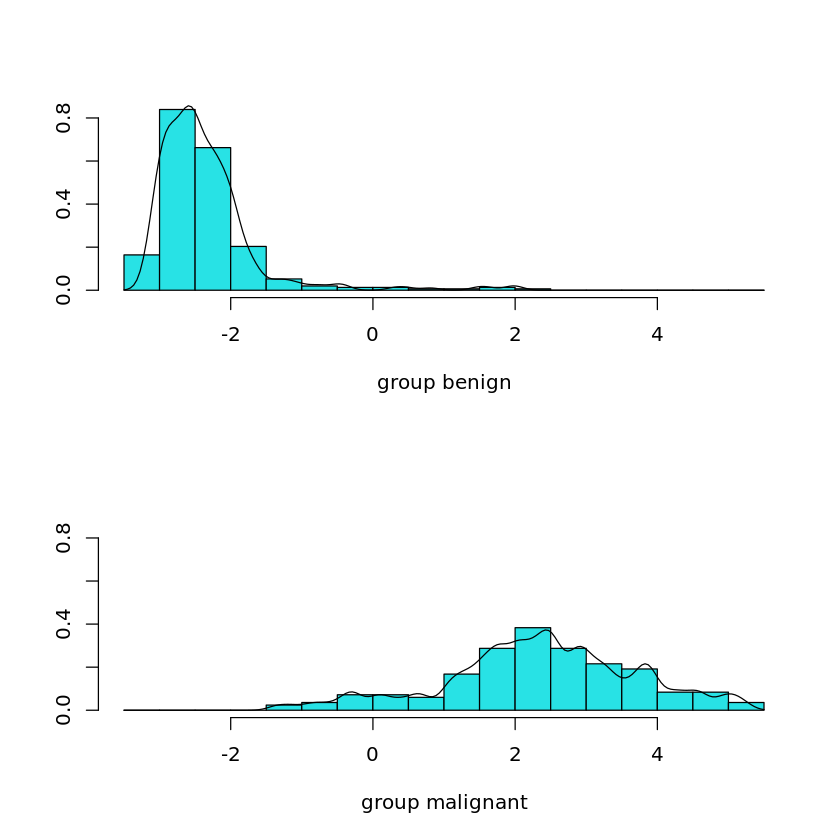

In [64]:
plot(lda.fit, type="both") # 판별 점수의 밀도를 그려준다.

- 두 그룹사이에 겹치는 부분은 올바르게 분류되지 않는 관찰값이 존재함을 나타낸다.

In [68]:
train.lda.probs <- predict(lda.fit)$posterior[,2]
confusionMatrix(trainY, train.lda.probs)
cat("[오차율]")
misClassError(trainY, train.lda.probs)

,0,1
,<int>,<int>
0,298,13
1,7,154


[오차율]

[1] 0.0424

In [69]:
test.lda.probs <- predict(lda.fit, newdata=test)$posterior[,2]
confusionMatrix(testY, test.lda.probs)
cat("[오차율]")
misClassError(testY, test.lda.probs)

,0,1
,<int>,<int>
0,138,5
1,1,67


[오차율]

[1] 0.0284

In [70]:
# 2차 판별 분석
qda.fit <- qda(class ~ ., data=train)
qda.fit

Call:
qda(class ~ ., data = train)

Prior probabilities of groups:
   benign malignant 
0.6461864 0.3538136 

Group means:
             thick   u.size  u.shape    adhsn   s.size     nucl    chrom
benign    3.006557 1.347541 1.409836 1.373770 2.124590 1.334426 2.131148
malignant 7.083832 6.502994 6.532934 5.556886 5.263473 7.712575 5.850299
             n.nuc      mit
benign    1.298361 1.078689
malignant 5.898204 2.904192

In [73]:
train.qda.probs <- predict(qda.fit)$posterior[,2]
confusionMatrix(trainY, train.qda.probs)
cat("[오차율]")
misClassError(trainY, train.qda.probs)

,0,1
,<int>,<int>
0,288,5
1,17,162


[오차율]

[1] 0.0466

In [74]:
test.qda.probs <- predict(qda.fit, newdata=test)$posterior[,2]
confusionMatrix(testY, test.qda.probs)
cat("[오차율]")
misClassError(testY, test.qda.probs)

,0,1
,<int>,<int>
0,135,1
1,4,71


[오차율]

[1] 0.0237

## 다변량 적응 회귀 스플라인(MARS, Multivaiate Adaptive Regression Splines)
- 회귀와 분류 두 가지 모두에 관한 선형 및 비선형 모형을 구축할 유연성을 제공
- 변수 간 상호작용 항을 지원
- 이해와 설명이 간단
- 데이터 전처리 과정이 거의 필요없다.
- 모든 타입의 데이터를 다룰 수 있다.
- 미관찰 데이터에 관해 성능이 좋다. -> 편차와 분산 사이의 균형을 잘 잡는다.
[특징]
- 힌지(hinge) 함수를 사용
- 변수의 자동 선택
    - 전방 패스(forward pass)를 통해 구축, 후방 패스(backward pass)를 통해 모형을 가지치기(pruning), 후방 패스에 일반화 교차 검증(GCV, Generalized Cross Validation)을 사용한다.
      $$
      GCV = {RSS \over N \times (1 - <유의미한 파라미터 개수>/N)^2}
      $$
    - earth 패키지 확인 : http://milbo.org/doc/earth-notes.pdf

In [77]:
# install.packages("earth")
library(earth)
set.seed(1)
earth.fit <- earth(class ~ ., data=train,
                  pmethod="cv", nfold=5, ncross=3, degree = 1, minspan=-1, glm=list(family=binomial)
                  )

Loading required package: Formula

Loading required package: plotmo

Loading required package: plotrix

Loading required package: TeachingDemos



In [79]:
summary(earth.fit)

Call: earth(formula=class~., data=train, pmethod="cv",
            glm=list(family=binomial), degree=1, nfold=5, ncross=3, minspan=-1)

GLM coefficients
             malignant
(Intercept) -5.6100983
u.size       0.0019525
u.shape      0.3347722
nucl         0.3915093
n.nuc        0.1398438
h(thick-3)   0.6547367
h(s.size-2)  0.2608634
h(3-chrom)  -1.1044964
h(chrom-3)   0.3523939

GLM (family binomial, link logit):
 nulldev  df       dev  df   devratio     AIC iters converged
 613.388 471   85.3009 463      0.861   103.3     8         1

Earth selected 9 of 11 terms, and 7 of 9 predictors (pmethod="cv")
Termination condition: RSq changed by less than 0.001 at 11 terms
Importance: nucl, u.size, thick, n.nuc, chrom, s.size, u.shape, ...
Number of terms at each degree of interaction: 1 8 (additive model)
Earth GRSq 0.8271316  RSq 0.8386769  mean.oof.RSq 0.8268134 (sd 0.0431)

pmethod="backward" would have selected:
    8 terms 7 preds,  GRSq 0.8273209  RSq 0.8374338  mean.oof.RSq 0.824710

- 총 8개의 항을 갖는다.(절편 포함) h()는 힌지함수를 나타낸다.
    - thick가 3보타 크면 계수는 0.6547이 해당 힌지함수에 곱해지고 그렇지 않으면 0의 값을 가진다.
    - chorm의 경우 3보다 작으면 -1.1045가 해당 힌지함수에 곱해지고 3보다 크면 0.3524가 힌지함수에 곱해지고 그렇지 않으면 0의 값을 가진다.

 plotmo grid:    thick u.size u.shape adhsn s.size nucl chrom n.nuc mit
                     4      1       1     1      2    1     3     1   1


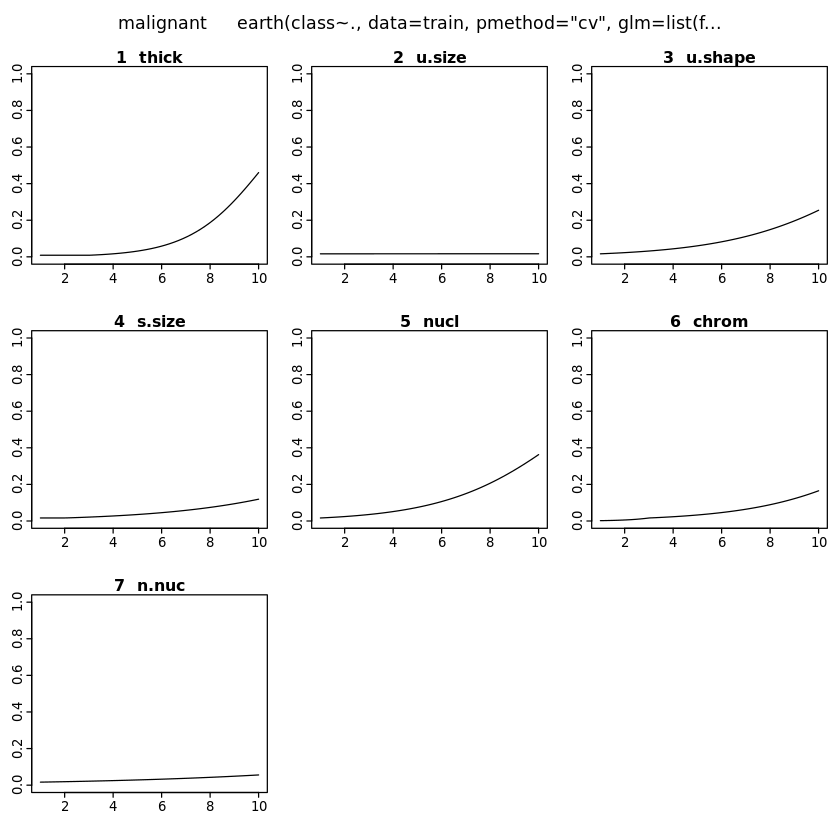

In [81]:
plotmo(earth.fit) # 모형의 각 독립 변수에 대해 종속 변수가 변하는 양상을 보여준다.

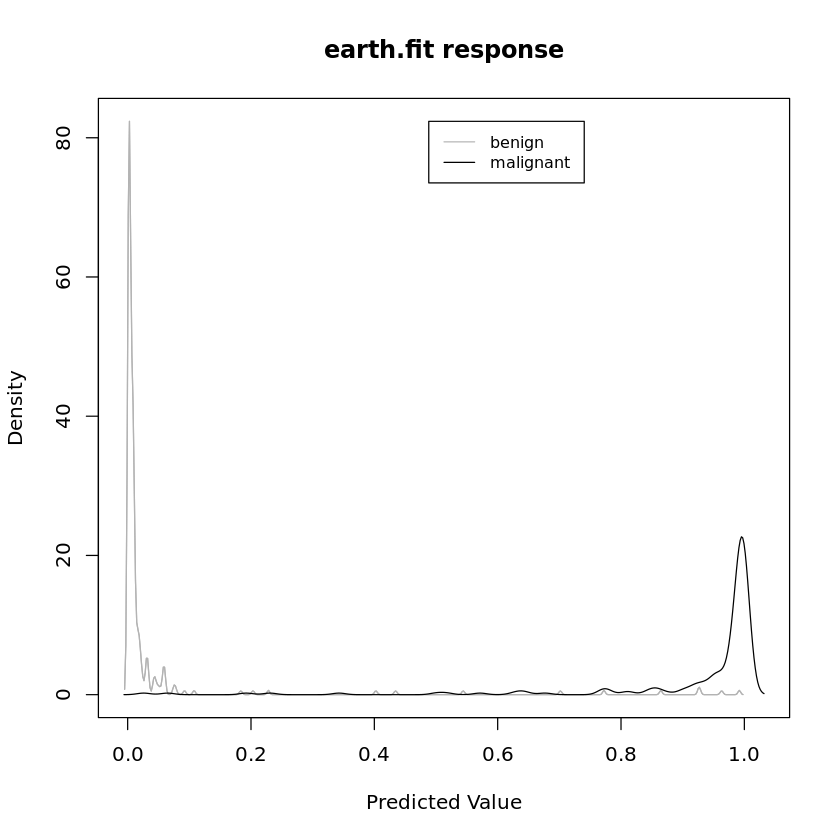

In [82]:
plotd(earth.fit) # 크래스 라벨에 딸느 예측 확률 밀도 함수 도표를 엊을 수 있다.

In [85]:
evimp(earth.fit) # 변수의 중요도를 볼 수 있다.

        nsubsets   gcv    rss
nucl           8 100.0  100.0
u.size         7  41.4   42.3
thick          6  22.3   24.2
n.nuc          5  13.4   16.1
chrom          4   9.2   12.2
s.size         3   6.0    9.2
u.shape        2   0.7    5.9

- nsubsets : 가지치기 패스를 한 후에 남은 변수를 담고 있는 모형의 서브 셋 개수
- gcv, rss : 각 예측 변수가 기여하는 각 감소값을 나타낸다.(0 ~100 사이의 값을 가진다.)

In [88]:
test.earth.probs <- predict(earth.fit, newdata=test, type="response")
confusionMatrix(testY, test.earth.probs)
cat("[오류율]")
misClassError(testY, test.earth.probs)

,0,1
,<int>,<int>
0,137,4
1,2,68


[오류율]

[1] 0.0284

### 모형의 선택
- 수신자 조작 특성(ROC,Receiver Operating Charecteristic) : 각 분류기의 성능을 조직화하여 시각화한다.
- y축은 참 양서율(TPR, True Positive Rate), x축은 거짓 양성율(FPR, False Positive Rate)  
  [confution matrix]
  
  | | |예측| |  
  |---|---|---|---|  
  |  ||True|False|  
  |실|True|TP|FN|  
  |제|False|FP|TN|  
    - TPR : TP/(TP+FN)
    - FPR : FP/(FP+TN)
- 곡선하 면적(AUC, Area Under the Curve) : ROC의 선 아래 면적

In [89]:
# install.packages("ROCR")
library(ROCR)
bad.fit <- glm(class ~ ., data=test, family=binomial)
test.bad.probs <- predict(bad.fit, type="response")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’




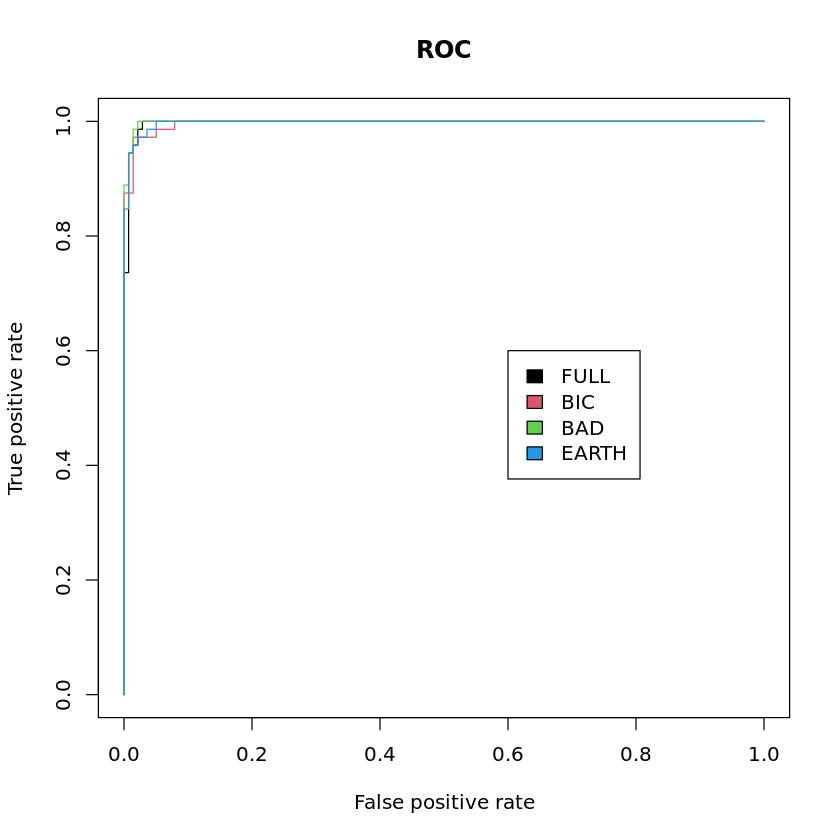

In [104]:
pred.full <- prediction(test.probs, test$class)
perf.full <- performance(pred.full, "tpr", "fpr")
plot(perf.full ,main="ROC", col=1)

pred.bic <- prediction(test.bic.probs, test$class)
perf.bic <- performance(pred.bic, "tpr", "fpr")
plot(perf.bic ,main="ROC", col=2, add=TRUE)

pred.bad <- prediction(test.bad.probs, test$class)
perf.bad <- performance(pred.bad, "tpr", "fpr")
plot(perf.bad ,main="ROC", col=3, add=TRUE)

pred.earth <- prediction(test.earth.probs, test$class)
perf.earth <- performance(pred.earth, "tpr", "fpr")
plot(perf.earth ,main="ROC", col=4, add=TRUE)

legend(0.6, 0.6, c("FULL", "BIC", "BAD", "EARTH"), 1:4)

In [115]:
cat(paste("FULL AUC : ", performance(pred.full, "auc")@y.values, "\n"))
cat(paste("BIC AUC : ", performance(pred.bic, "auc")@y.values, "\n"))
cat(paste("BAD AUC : ", performance(pred.bad, "auc")@y.values, "\n"))
cat(paste("EARCH AUC : ", performance(pred.earth, "auc")@y.values))

FULL AUC :  0.997302158273381 
BIC AUC :  0.996802557953637 
BAD AUC :  0.998701039168665 
EARCH AUC :  0.997601918465228